<a href="https://colab.research.google.com/github/sureshd3004/1-2-Taste/blob/main/M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
ticker_symbol = 'HDFCBANK.NS'  # '.NS' indicates that it's on the NSE
import yfinance as yf
# Download the stock data
df = yf.download(ticker_symbol)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,3.030,3.030,2.925,2.980,2.331029,350000
1996-01-02,2.980,3.025,2.950,2.975,2.327119,412000
1996-01-03,2.975,2.995,2.950,2.985,2.334940,284000
1996-01-04,2.985,2.980,2.940,2.965,2.319295,282000
1996-01-05,2.965,2.980,2.950,2.960,2.315385,189000


In [9]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
Date,,,,
1996-01-01,0.0,2.980000,NaN,NaN
1996-01-02,0.0,2.975000,NaN,NaN
1996-01-03,0.0,2.985000,NaN,NaN
1996-01-04,0.0,2.965000,NaN,NaN
1996-01-05,0.0,2.960000,NaN,NaN
...,...,...,...,...
2024-08-09,0.0,1650.199951,1768.650024,1281.300049
2024-08-12,0.0,1660.099976,1768.650024,1281.300049
2024-08-13,0.0,1603.199951,1768.650024,1281.300049


In [10]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = actual movement in the real world
    delay = how much interval you want to delay to change our decision from buy to sell, vice versa
    initial_state = 1 is buy, 0 is sell
    initial_money = 1000, ignore what kind of currency
    max_buy = max quantity for share to buy
    max_sell = max quantity for share to sell
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances %f, not enough money to buy a unit price %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything, inventory 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)

    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [11]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 922: cannot sell anything, inventory 0
day 951: cannot sell anything, inventory 0
day 962: cannot sell anything, inventory 0
day 963: cannot sell anything, inventory 0
day 1020: cannot sell anything, inventory 0
day 1021: cannot sell anything, inventory 0
day 1022: cannot sell anything, inventory 0
day 1023: cannot sell anything, inventory 0
day 1024: cannot sell anything, inventory 0
day 1025: cannot sell anything, inventory 0
day 1028: cannot sell anything, inventory 0
day 1032: cannot sell anything, inventory 0
day 1033: cannot sell anything, inventory 0
day 1034: cannot sell anything, inventory 0
day 1059: cannot sell anything, inventory 0
day 1060: cannot sell anything, inventory 0
day 1061: cannot sell anything, inventory 0
day 1063: cannot sell anything, inventory 0
day 1065: cannot sell anything, inventory 0
day 1066: cannot sell anything, inventory 0
day 1067: cannot sell anything, inventory 0
day 1070: cannot sell anything, inventory 0
day 1071: cannot sell anything, inve

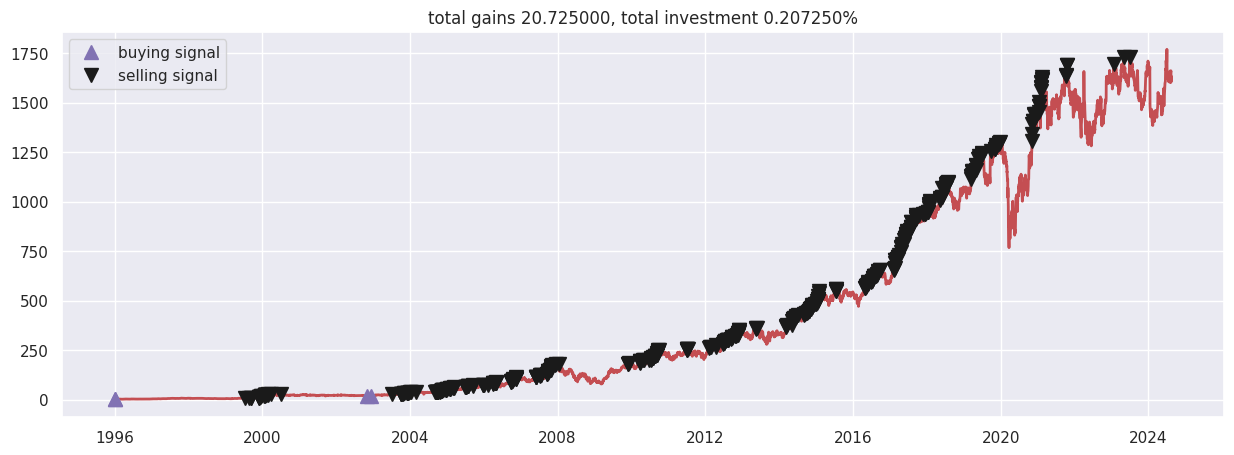

In [12]:
close = df['Close']
fig = plt.figure(figsize = (15,5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
plt.show()